In [16]:
!pip install keras-tuner --upgrade

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snn
import scipy.stats as stats
import warnings
from keras.models import Sequential
from kerastuner import RandomSearch
warnings.filterwarnings(action="ignore")
print("Done")

Done


In [18]:
# Loading Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
# Shape of Dataset
df.shape

(1470, 35)

In [19]:
# Cheking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
# Checking Dtypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
# Cheking Null Values
df.isnull().sum()/len(df)*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [37]:
# Seperating Numeric and Categorical Features

num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

In [42]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [46]:
temp_cat = ["Education","EnvironmentSatisfaction","JobSatisfaction","JobInvolvement","JobLevel","NumCompaniesWorked","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsAtCompany","YearsSinceLastPromotion"]
for i in temp_cat:
    df[i] = df[i].astype(object)
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [55]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns
print("No.of.num_cols:",len(num_col))
print("No.of.cat_cols:",len(cat_col))

No.of.num_cols: 14
No.of.cat_cols: 21


### Univariate Analysis

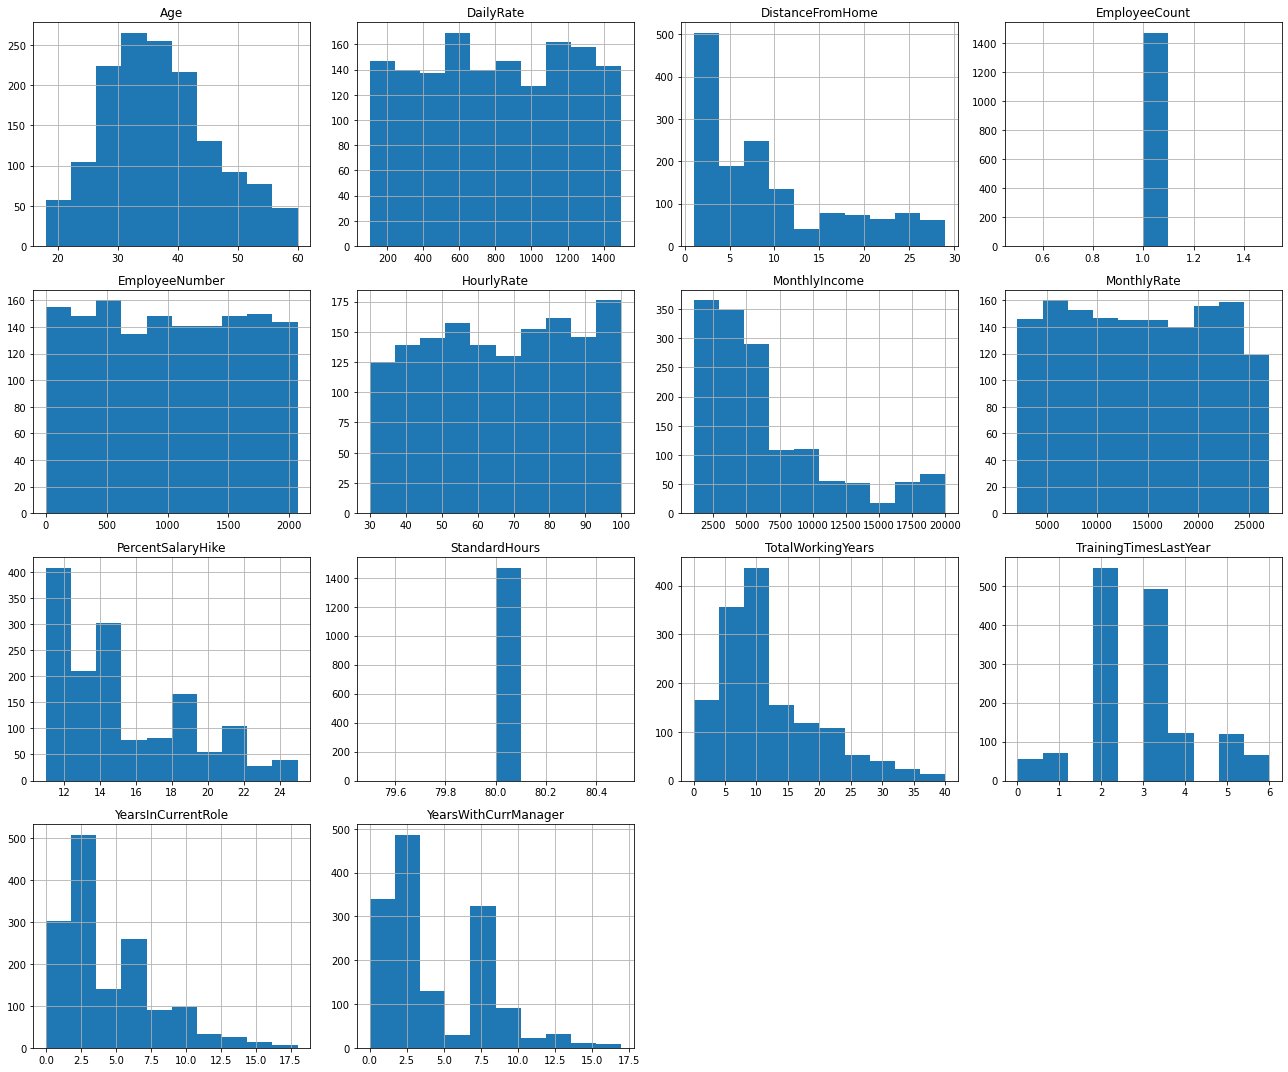

In [48]:
# Numercal features
plt.rcParams["figure.figsize"] = [18,15]
df.hist()
plt.tight_layout()
plt.show()

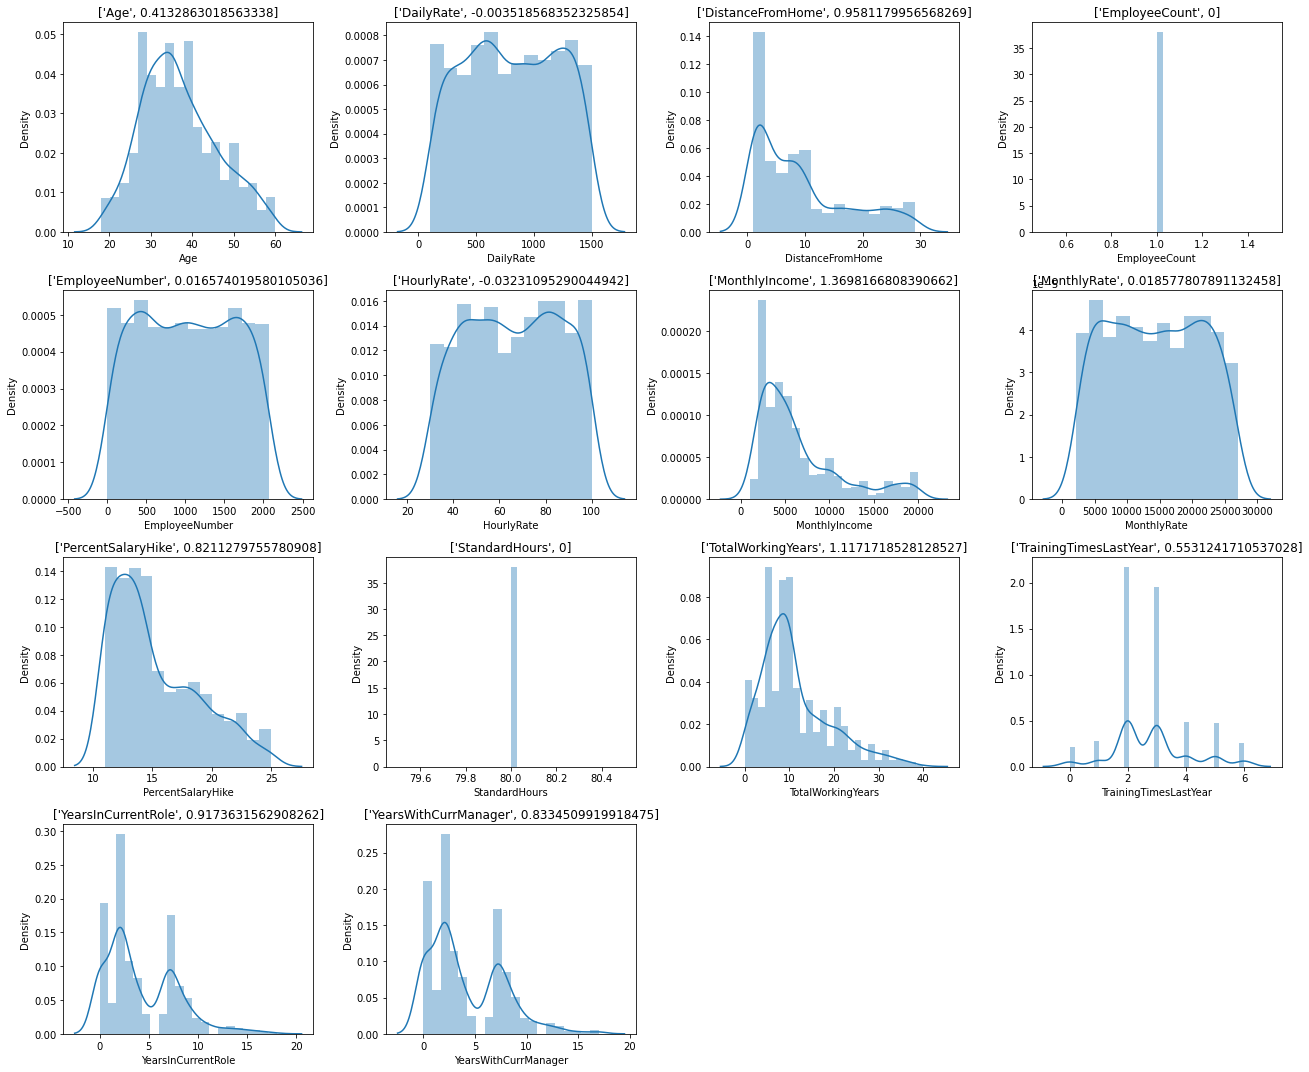

In [61]:
m=4
n=4
iterator = 1
for i in num_col:
    plt.subplot(m,n,iterator)
    plt.title([i,df[i].skew()])
    snn.distplot(df[i])
    plt.tight_layout()
    iterator+=1

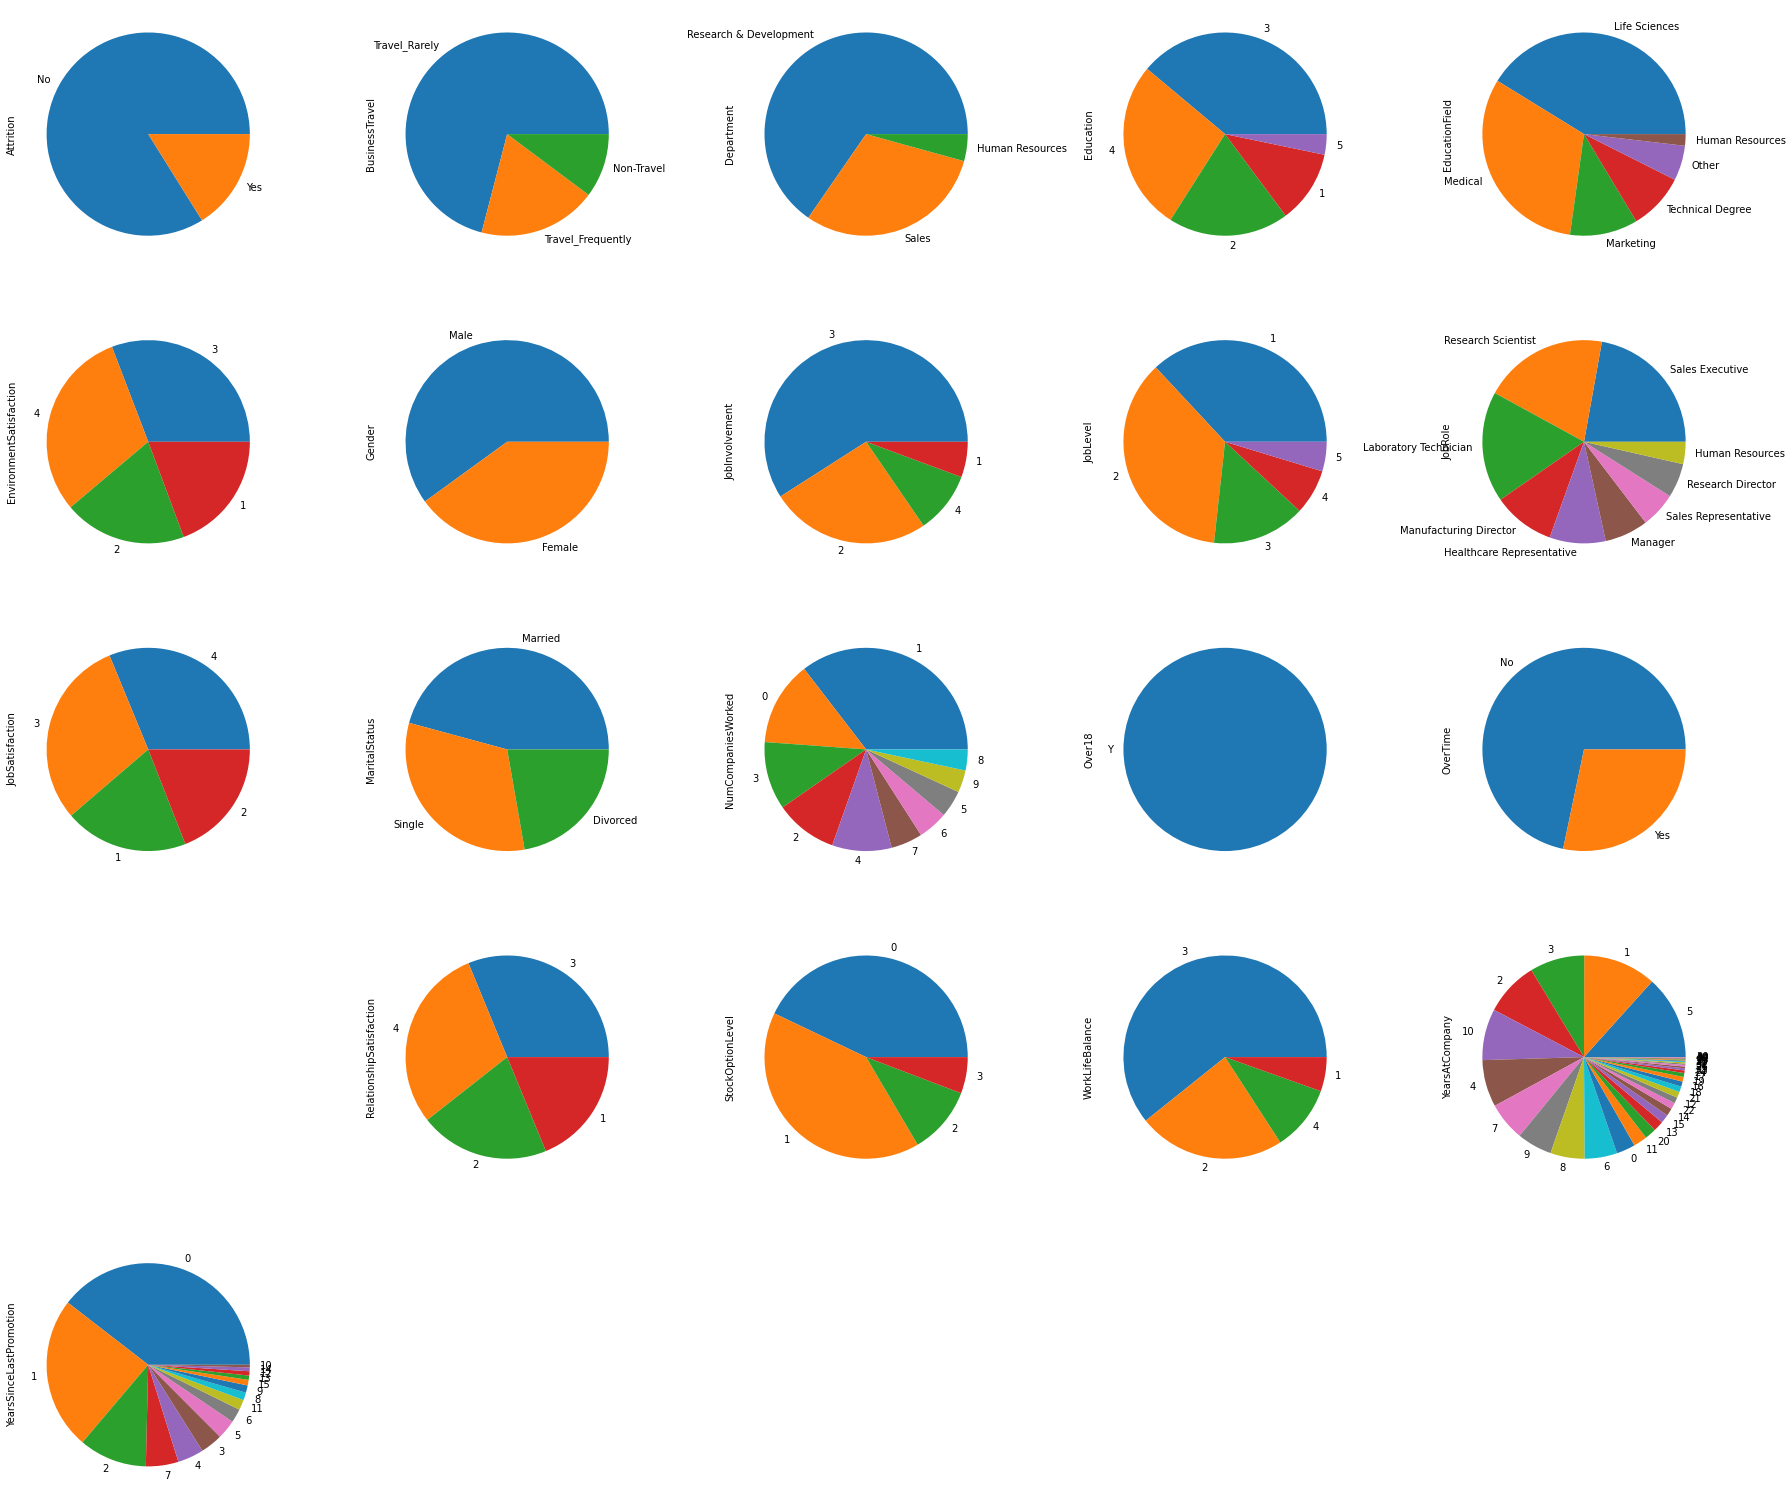

In [82]:
m=5
n=5
iterator = 1
for i in cat_col:
    plt.rcParams["figure.figsize"] = [25,22]
    plt.subplot(m,n,iterator)
    df[i].value_counts(normalize=True).plot(kind="pie")
    plt.tight_layout()
    iterator+=1

### Bivariate Analysis

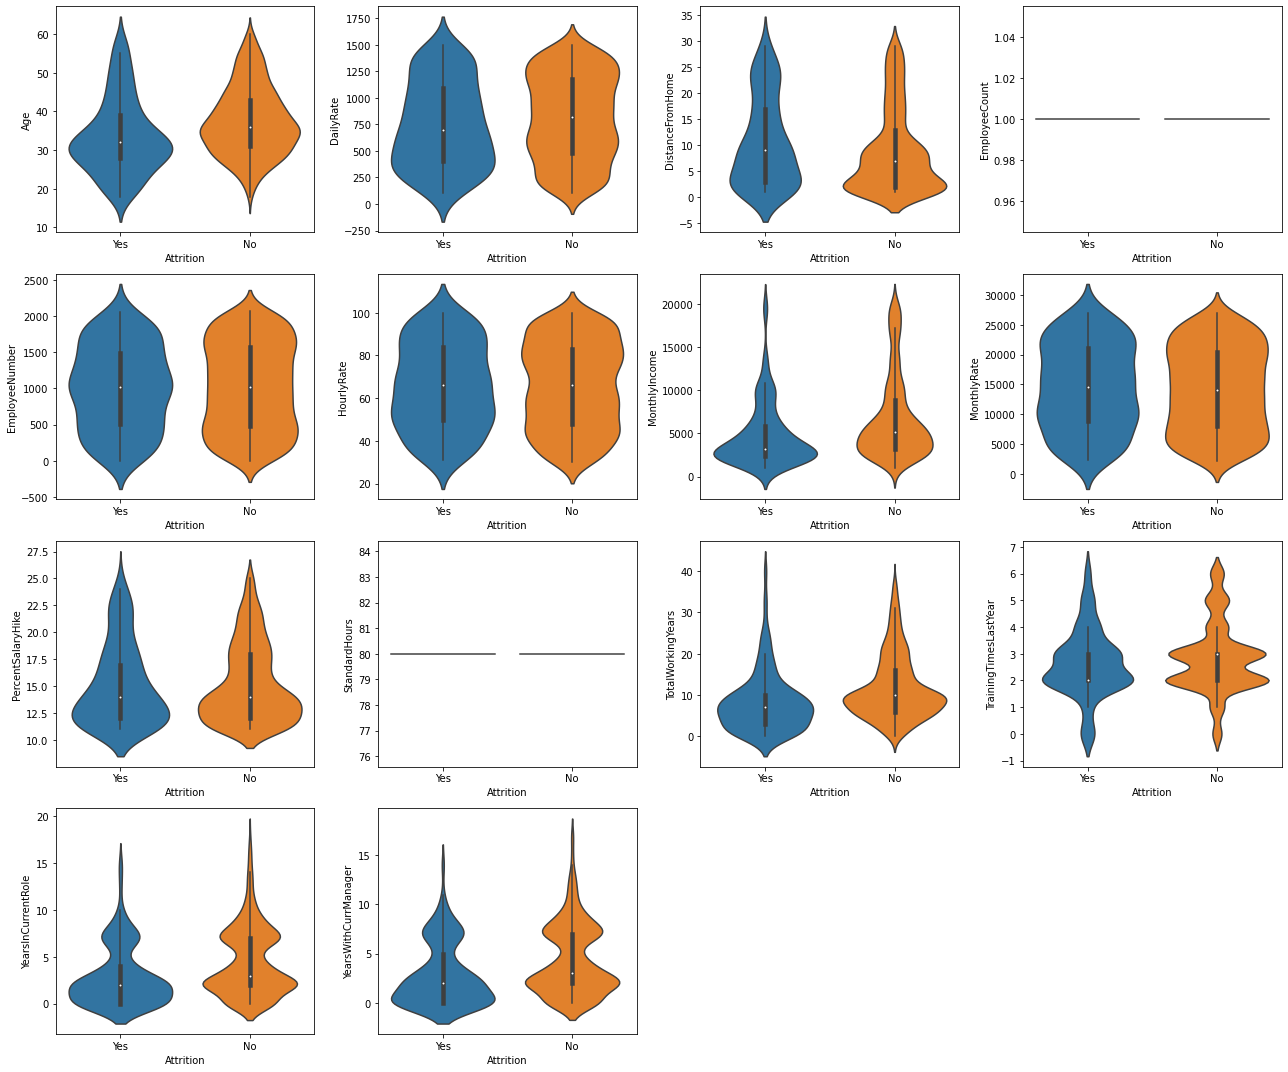

In [68]:
m=4
n=4
iterator = 1
for i in num_col:
    plt.subplot(m,n,iterator)
    snn.violinplot(y=df[i],x=df["Attrition"])
    plt.tight_layout()
    iterator+=1

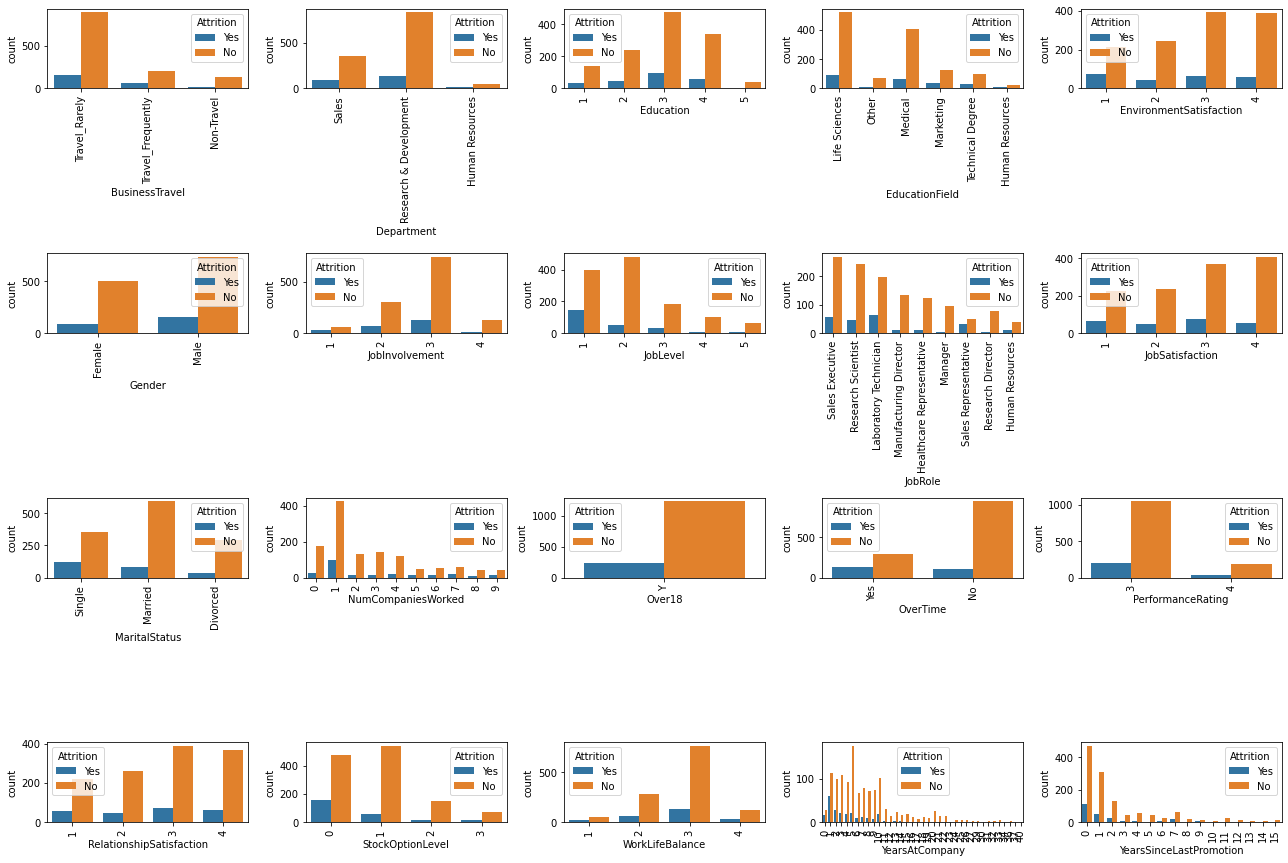

In [99]:
m=5
n=5
iterator = 1
for i in cat_col:
    if i == "Attrition":
        continue
    else:
        plt.rcParams["figure.figsize"] = [18,15]
        plt.subplot(m,n,iterator)
        snn.countplot(x=df[i],hue=df["Attrition"])
        plt.xticks(rotation=90)
        plt.tight_layout()
        iterator+=1

In [95]:
for i in num_col:
    stat,pvalue = stats.f_oneway(df["Attrition"].map({"Yes":1,"No":0}),df[i])
    print("P-Value",i,":",pvalue)

P-Value Age : 0.0
P-Value DailyRate : 0.0
P-Value DistanceFromHome : 5.3143670900145e-310
P-Value EmployeeCount : 0.0
P-Value EmployeeNumber : 0.0
P-Value HourlyRate : 0.0
P-Value MonthlyIncome : 0.0
P-Value MonthlyRate : 0.0
P-Value PercentSalaryHike : 0.0
P-Value StandardHours : 0.0
P-Value TotalWorkingYears : 0.0
P-Value TrainingTimesLastYear : 0.0
P-Value YearsInCurrentRole : 7.895022844083e-312
P-Value YearsWithCurrManager : 2.5189425836816536e-306


In [119]:
sig_features = []
print("unwanted Features:-")
for i in cat_col:
    if i == "Attrition":
        continue
    else:
        if stats.chi2_contingency(pd.crosstab(df["Attrition"],df[i]))[1] < 0.05:
            sig_features.append(i)
        else:
            print(i,stats.chi2_contingency(pd.crosstab(df["Attrition"],df[i]))[1])
            continue
print("\n")
print("Significant Features:-")
print(sig_features)

unwanted Features:-
Education 0.5455253376565949
Gender 0.29057244902890855
Over18 1.0
PerformanceRating 0.9900745465934576
RelationshipSatisfaction 0.1549724437105263
YearsSinceLastPromotion 0.11193387671448679


Significant Features:-
['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany']


In [131]:
# Dropping unwanted Features
new_df = df.drop(["Education","Gender","Over18","PerformanceRating","RelationshipSatisfaction","YearsSinceLastPromotion",
                  "StandardHours","EmployeeCount","EmployeeNumber"],axis=1)
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,0,8,0,1,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,1,10,3,3,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,0,8,3,3,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,1,17,3,3,5,2,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,1,9,5,3,7,7,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,1,6,0,3,6,2,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,0,17,3,2,9,6,8


In [132]:
for i in temp_cat:
    if i in new_df.columns:
        new_df[i] = new_df[i].astype(int)
    else:
        continue
new_df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
DailyRate                   int64
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int32
HourlyRate                  int64
JobInvolvement              int32
JobLevel                    int32
JobRole                    object
JobSatisfaction             int32
MaritalStatus              object
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int32
OverTime                   object
PercentSalaryHike           int64
StockOptionLevel            int32
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int32
YearsAtCompany              int32
YearsInCurrentRole          int64
YearsWithCurrManager        int64
dtype: object

In [138]:
new_df["OverTime"] = new_df["OverTime"].map({"Yes":1,"No":0})
new_df["Attrition"] = new_df["Attrition"].map({"Yes":1,"No":0})

final_df = pd.get_dummies(new_df,drop_first=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int32
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int32
 7   JobLevel                           1470 non-null   int32
 8   JobSatisfaction                    1470 non-null   int32
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int32
 12  OverTime            

In [206]:
model = Sequential()

model.add(keras.layers.Dense(units=20,kernel_initializer="he_uniform",activation="relu",input_dim=37))
model.add(keras.layers.Dense(units=30,kernel_initializer="he_uniform",activation="relu"))
model.add(keras.layers.Dense(units=35,kernel_initializer="he_uniform",activation="relu"))
model.add(keras.layers.Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

trans_df = ss.fit_transform(final_df.drop(["Attrition","HourlyRate","PercentSalaryHike"],axis=1))
trans_df =pd.DataFrame(trans_df,columns=final_df.drop(["Attrition","HourlyRate","PercentSalaryHike"],axis=1).columns)
trans_df = pd.concat([trans_df,final_df["Attrition"]],axis=1)
trans_df

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,0.446350,0.742527,-1.010909,-0.660531,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1.591746,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1
1,1.322365,-1.297775,-0.147150,0.254625,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,0
2,0.008343,1.414363,-0.887515,1.169781,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1
3,-0.429664,1.461466,-0.764121,1.169781,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1.591746,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,0
4,-1.086676,-0.524295,-0.887515,-1.575686,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.628241,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,0.254625,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,-0.628241,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.314873,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,0
1466,0.227347,-0.469754,-0.393938,1.169781,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.628241,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,0.806541,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,0
1467,-1.086676,-1.605183,-0.640727,-0.660531,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.591746,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.314873,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,0
1468,1.322365,0.546677,-0.887515,1.169781,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.628241,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900

In [207]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                760       
                                                                 
 dense_12 (Dense)            (None, 30)                630       
                                                                 
 dense_13 (Dense)            (None, 35)                1085      
                                                                 
 dense_14 (Dense)            (None, 1)                 36        
                                                                 
Total params: 2511 (9.81 KB)
Trainable params: 2511 (9.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
y = trans_df["Attrition"]
x = trans_df.drop("Attrition",axis=1) 

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.40,random_state=10)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((882, 37), (588, 37), (882,), (588,))

In [266]:
model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest))

Epoch 1/200
28/28 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3180 - val_accuracy: 0.8214
Epoch 2/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3237 - val_accuracy: 0.8248
Epoch 3/200
28/28 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3255 - val_accuracy: 0.8214
Epoch 4/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3349 - val_accuracy: 0.8214
Epoch 5/200
28/28 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3396 - val_accuracy: 0.8231
Epoch 6/200
28/28 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3550 - val_accuracy: 0.8248
Epoch 7/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3543 - val_accuracy: 0.8214
Epoch 8/200
2

28/28 [==============================] - 0s 8ms/step - loss: 9.6131e-05 - accuracy: 1.0000 - val_loss: 1.8665 - val_accuracy: 0.8248
Epoch 114/200
28/28 [==============================] - 0s 7ms/step - loss: 9.4012e-05 - accuracy: 1.0000 - val_loss: 1.8710 - val_accuracy: 0.8231
Epoch 115/200
28/28 [==============================] - 0s 8ms/step - loss: 9.2150e-05 - accuracy: 1.0000 - val_loss: 1.8735 - val_accuracy: 0.8214
Epoch 116/200
28/28 [==============================] - 0s 8ms/step - loss: 8.9672e-05 - accuracy: 1.0000 - val_loss: 1.8808 - val_accuracy: 0.8248
Epoch 117/200
28/28 [==============================] - 0s 9ms/step - loss: 8.8408e-05 - accuracy: 1.0000 - val_loss: 1.8815 - val_accuracy: 0.8231
Epoch 118/200
28/28 [==============================] - 0s 8ms/step - loss: 8.6287e-05 - accuracy: 1.0000 - val_loss: 1.8871 - val_accuracy: 0.8231
Epoch 119/200
28/28 [==============================] - 0s 8ms/step - loss: 8.4472e-05 - accuracy: 1.0000 - val_loss: 1.8934 - val_ac

Epoch 169/200
28/28 [==============================] - 0s 9ms/step - loss: 3.2839e-05 - accuracy: 1.0000 - val_loss: 2.0914 - val_accuracy: 0.8248
Epoch 170/200
28/28 [==============================] - 0s 8ms/step - loss: 3.2110e-05 - accuracy: 1.0000 - val_loss: 2.0951 - val_accuracy: 0.8248
Epoch 171/200
28/28 [==============================] - 0s 8ms/step - loss: 3.1522e-05 - accuracy: 1.0000 - val_loss: 2.1003 - val_accuracy: 0.8248
Epoch 172/200
28/28 [==============================] - 0s 8ms/step - loss: 3.0951e-05 - accuracy: 1.0000 - val_loss: 2.1029 - val_accuracy: 0.8248
Epoch 173/200
28/28 [==============================] - 0s 8ms/step - loss: 3.0438e-05 - accuracy: 1.0000 - val_loss: 2.1048 - val_accuracy: 0.8231
Epoch 174/200
28/28 [==============================] - 0s 7ms/step - loss: 2.9948e-05 - accuracy: 1.0000 - val_loss: 2.1096 - val_accuracy: 0.8248
Epoch 175/200
28/28 [==============================] - 0s 8ms/step - loss: 2.9336e-05 - accuracy: 1.0000 - val_loss: 2

In [220]:
def rs_model(rs):
    model = Sequential()
    for i in range(rs.Int("num_layers",2,20)):
        model.add(keras.layers.Dense(units = rs.Int("units_"+str(i),min_value =34,max_value=200,step=34),
                                     activation = "relu",kernel_initializer="he_uniform"))
        
    model.add(keras.layers.Dense(units=1,kernel_initializer="glorot_uniform",activation = "sigmoid"))
    model.compile(optimizer = keras.optimizers.Adam(rs.Choice("Learning_rate",[0.01,0.001,0.0001])),loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Step : 2
tuner = RandomSearch(rs_model,objective = "val_accuracy",max_trials = 5,
                     directory = "Project",project_name = "IBM-Attritions")


tuner.search(xtrain,ytrain,epochs = 10 , validation_data = (xtest,ytest))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.8571428656578064

Best val_accuracy So Far: 0.8571428656578064
Total elapsed time: 00h 00m 29s
INFO:tensorflow:Oracle triggered exit


In [221]:
tuner.results_summary()

Results summary
Results in Project\IBM-Attritions
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 4
units_0: 68
units_1: 136
Learning_rate: 0.01
units_2: 136
units_3: 170
units_4: 102
units_5: 170
units_6: 34
units_7: 34
units_8: 102
units_9: 136
units_10: 170
units_11: 68
units_12: 34
units_13: 68
units_14: 34
units_15: 170
units_16: 34
Score: 0.8571428656578064

Trial 1 summary
Hyperparameters:
num_layers: 17
units_0: 170
units_1: 68
Learning_rate: 0.001
units_2: 102
units_3: 34
units_4: 102
units_5: 68
units_6: 102
units_7: 170
units_8: 102
units_9: 34
units_10: 34
units_11: 34
units_12: 34
units_13: 34
units_14: 34
units_15: 34
units_16: 34
Score: 0.8418367505073547

Trial 3 summary
Hyperparameters:
num_layers: 6
units_0: 34
units_1: 34
Learning_rate: 0.01
units_2: 102
units_3: 34
units_4: 102
units_5: 34
units_6: 68
units_7: 170
units_8: 102
units_9: 102
units_10: 102
units_11: 34
units_12: 68
units_13: 34
units_

In [267]:
model.predict(pd.DataFrame(xtest.iloc[:20,:].values.reshape(20,37)))>0.5

1/1 [==============================] - 0s 21ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False]])

In [238]:
pd.DataFrame(trans_df.iloc[1,:].values.reshape(1,38))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1.322365,-1.297775,-0.14715,0.254625,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,0.806541,2.075297,-1.562889,0.727775,-0.65996,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,0.0


In [258]:
ytest.head(20)

793     0
689     1
1254    0
233     0
1403    0
1332    1
261     0
1058    1
74      0
983     0
145     0
1235    0
35      0
301     0
524     0
126     1
56      0
1408    0
863     0
191     0
Name: Attrition, dtype: int64

In [269]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_model = lr.fit(xtrain,ytrain)

lr_model.score(xtrain,ytrain),lr_model.score(xtest,ytest)

(0.8956916099773242, 0.8673469387755102)

In [277]:
lr.predict(xtest.iloc[:30,:])

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [276]:
ytest.iloc[:30]

793     0
689     1
1254    0
233     0
1403    0
1332    1
261     0
1058    1
74      0
983     0
145     0
1235    0
35      0
301     0
524     0
126     1
56      0
1408    0
863     0
191     0
298     0
1188    0
593     0
1353    1
384     0
1156    0
573     1
558     0
120     0
1213    1
Name: Attrition, dtype: int64